In [1]:
import random
import numpy as np
from numpy import prod
from scipy.stats import beta

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

from collections import Counter

/var/folders/g_/v_4svj7n17z2m3fg9lhk_xcw0000gp/T/ipykernel_12199/424043200.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')


In [2]:
def normalize_probs(probs):
    total = sum(probs)
    normedprobs = []
    for p in probs:
        normedprobs.append(p / total)
    return normedprobs

def roulette_wheel(normedprobs):
    r = random.random()
    print("This is the r value: " + str(r))
    # r = 0.3
    accumulator = normedprobs[0]
    print("This is the accumulator value: " + str(accumulator))
    # accumulator 0.25
    for i in range(len(normedprobs)):
        # for 0.25, 0.50, 0.75, 0.90
        if r < accumulator:
            # if 0.3 < 0.25
            # if 0.3 < 0.50
            # if 0.3 < 0.75
            # if 0.3 < 0.90
            print("This is the i value: " + str(i))
            return i
            # NO
            # 0.50
            # 0.75
            # 0.90
        accumulator = accumulator + normedprobs[i + 1]
        print("This is the new accumulator value: " + str(accumulator))
        # 0.25 + 0.50
        # accumulator = 0.75
        # 0.50 + 0.75
        # accumulator = 1.25
        # 0.75 + 0.90
        # accumulator = 1.65
        # 0.90
        # accumulator = 0.90

In [3]:
probs1 = [0.25, 0.50, 0.75, 0.90]
print(sum(probs1))

normalized_probs1 = normalize_probs(probs1)
print(normalized_probs1)

normalized_probs1 = normalize_probs(probs1)
roulette_wheel(normalized_probs1)  
# roulette wheel returns the index of the value that is larger than that random number generated at the start
# at what index is the accumulator greater than the random number?
# if it continues to be smaller, add the value of the next index to the accumulator and then compare the r and the new accumulator
# r < 0.10416666666666667 (if true, return index 0)
# r < 0.10416666666666667 + 0.20833333333333334 = 0.3125 (if true, return index 1)
# r < 0.3125 + 0.3125 = 0.625 (if true, return index 2)
# r < 0.625 + 0.375 = 1 (if true, return index 3)
# the chances that r is a little value, that is smaller than the smallest value of the probabilities


2.4
[0.10416666666666667, 0.20833333333333334, 0.3125, 0.375]
This is the r value: 0.08619096324728981
This is the accumulator value: 0.10416666666666667
This is the i value: 0


0

In [4]:
list = []
for i in range(50):
    list.append(roulette_wheel(normalized_probs1))

list

This is the r value: 0.5888706805553079
This is the accumulator value: 0.10416666666666667
This is the new accumulator value: 0.3125
This is the new accumulator value: 0.625
This is the i value: 2
This is the r value: 0.9183750922324723
This is the accumulator value: 0.10416666666666667
This is the new accumulator value: 0.3125
This is the new accumulator value: 0.625
This is the new accumulator value: 1.0
This is the i value: 3
This is the r value: 0.05587241821673938
This is the accumulator value: 0.10416666666666667
This is the i value: 0
This is the r value: 0.3025315281100325
This is the accumulator value: 0.10416666666666667
This is the new accumulator value: 0.3125
This is the i value: 1
This is the r value: 0.36626796682805307
This is the accumulator value: 0.10416666666666667
This is the new accumulator value: 0.3125
This is the new accumulator value: 0.625
This is the i value: 2
This is the r value: 0.4945830011052279
This is the accumulator value: 0.10416666666666667
This is

[2,
 3,
 0,
 1,
 2,
 2,
 1,
 3,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 3,
 0,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3]

In [5]:
print(list.count(0))
print(list.count(1))
print(list.count(2))
print(list.count(3))

Counter(list)
# big index value = takes up most of the space in the sum of index values
# 0.90 occupies more space than 0.25, out of 2.4, so when normalized

my_dict = dict.fromkeys(probs1)
print(my_dict)

# for key, val in zip(my_dict, normalized_probs1):
#     my_dict[key] = val

for key, val in zip(my_dict, 
                    [
                        [list.count(0), normalized_probs1[0]], 
                        [list.count(1), normalized_probs1[1]],
                        [list.count(2), normalized_probs1[2]],
                        [list.count(3), normalized_probs1[3]]
                    ]):
        my_dict[key] = val    

print(my_dict)

5
12
20
13
{0.25: None, 0.5: None, 0.75: None, 0.9: None}
{0.25: [5, 0.10416666666666667], 0.5: [12, 0.20833333333333334], 0.75: [20, 0.3125], 0.9: [13, 0.375]}


probability of using word 1

In [6]:
# spacing is 0.01

grid_granularity = 100
grid_increment = 1 / grid_granularity
 
possible_pw1 = []
for i in range(grid_granularity):
    possible_pw1.append(grid_increment / 2 + (grid_increment * i))
possible_pw1

[0.005,
 0.015,
 0.025,
 0.034999999999999996,
 0.045,
 0.055,
 0.065,
 0.07500000000000001,
 0.085,
 0.095,
 0.10500000000000001,
 0.115,
 0.125,
 0.135,
 0.14500000000000002,
 0.155,
 0.165,
 0.17500000000000002,
 0.185,
 0.195,
 0.20500000000000002,
 0.215,
 0.225,
 0.23500000000000001,
 0.245,
 0.255,
 0.265,
 0.275,
 0.28500000000000003,
 0.295,
 0.305,
 0.315,
 0.325,
 0.335,
 0.34500000000000003,
 0.35500000000000004,
 0.365,
 0.375,
 0.385,
 0.395,
 0.405,
 0.41500000000000004,
 0.425,
 0.435,
 0.445,
 0.455,
 0.465,
 0.47500000000000003,
 0.485,
 0.495,
 0.505,
 0.515,
 0.525,
 0.535,
 0.545,
 0.555,
 0.5650000000000001,
 0.5750000000000001,
 0.585,
 0.595,
 0.605,
 0.615,
 0.625,
 0.635,
 0.645,
 0.655,
 0.665,
 0.675,
 0.685,
 0.6950000000000001,
 0.7050000000000001,
 0.715,
 0.725,
 0.735,
 0.745,
 0.755,
 0.765,
 0.775,
 0.785,
 0.795,
 0.805,
 0.8150000000000001,
 0.8250000000000001,
 0.8350000000000001,
 0.845,
 0.855,
 0.865,
 0.875,
 0.885,
 0.895,
 0.905,
 0.915,
 0.9

$$
\frac{1/100}{2} + (\frac{1}{100} * 0)
$$
$$
\frac{1/100}{2} + (\frac{1}{100} * 99)
$$

In [7]:
# spacing is 0.005

grid_granularity = 100
grid_increment = 1 / grid_granularity

possible_pw1_2 = []
# word 1 is used with probability 0.005, etc. 

# spacing is 0.05
for i in range(grid_granularity * 2):
    value = (grid_increment / 2 + ((grid_increment * i) / 2))
    # grid increment * i ensures that + 0, + 0.01, + 0.02)
    # print(value)
    possible_pw1_2.append(value)

del possible_pw1_2[-1]
possible_pw1_2

[0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.030000000000000002,
 0.034999999999999996,
 0.04,
 0.045,
 0.049999999999999996,
 0.055,
 0.06,
 0.065,
 0.07,
 0.07500000000000001,
 0.08,
 0.085,
 0.09000000000000001,
 0.095,
 0.1,
 0.10500000000000001,
 0.11,
 0.115,
 0.12000000000000001,
 0.125,
 0.13,
 0.135,
 0.14,
 0.14500000000000002,
 0.15,
 0.155,
 0.16,
 0.165,
 0.17,
 0.17500000000000002,
 0.18000000000000002,
 0.185,
 0.19,
 0.195,
 0.2,
 0.20500000000000002,
 0.21000000000000002,
 0.215,
 0.22,
 0.225,
 0.23,
 0.23500000000000001,
 0.24000000000000002,
 0.245,
 0.25,
 0.255,
 0.26,
 0.265,
 0.27,
 0.275,
 0.28,
 0.28500000000000003,
 0.29000000000000004,
 0.295,
 0.3,
 0.305,
 0.31,
 0.315,
 0.32,
 0.325,
 0.33,
 0.335,
 0.34,
 0.34500000000000003,
 0.35000000000000003,
 0.35500000000000004,
 0.36,
 0.365,
 0.37,
 0.375,
 0.38,
 0.385,
 0.39,
 0.395,
 0.4,
 0.405,
 0.41000000000000003,
 0.41500000000000004,
 0.42000000000000004,
 0.425,
 0.43,
 0.435,
 0.44,
 0.445,
 0.45,
 0.455,

In [8]:
# spacing is 0.01

grid_granularity = 100
grid_increment = 1 / grid_granularity

possible_pw1_3 = []
# word 1 is used with probability 0.005, etc. 

# spacing is 0.01
for i in range(grid_granularity):
    value = (grid_increment + (grid_increment * i))
    # grid increment * i ensures that + 0, + 0.01, + 0.02)
    # print(value)
    possible_pw1_3.append(value) 

# del possible_pw1_3[-1]
possible_pw1_3

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.06999999999999999,
 0.08,
 0.09,
 0.09999999999999999,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15000000000000002,
 0.16,
 0.17,
 0.18000000000000002,
 0.19,
 0.2,
 0.21000000000000002,
 0.22,
 0.23,
 0.24000000000000002,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29000000000000004,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36000000000000004,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41000000000000003,
 0.42000000000000004,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47000000000000003,
 0.48000000000000004,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.5700000000000001,
 0.5800000000000001,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.6900000000000001,
 0.7000000000000001,
 0.7100000000000001,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.8200000000000001,
 0.8300000000000001,
 0.8400000000000001,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.9400000000000001,
 0.950000000

In [9]:
three_diff_spacins_btwn_probs = [possible_pw1, possible_pw1_2, possible_pw1_3]

# for p in three_diff_spacins_btwn_probs:
#     print(np.unique(p, return_counts=False))

# for p in three_diff_spacins_btwn_probs:
#     for x in set(p):
#         print(p.count(x))

for p in three_diff_spacins_btwn_probs:
    print(len(p))

# the spacing in possible_pw1_2 means there are not 100 values

100
199
100


In [10]:
def calculate_prior(alpha):
    prior = []
    for pw1 in possible_pw1:
        prior.append(beta.pdf(pw1, alpha, alpha))
    return normalize_probs(prior)

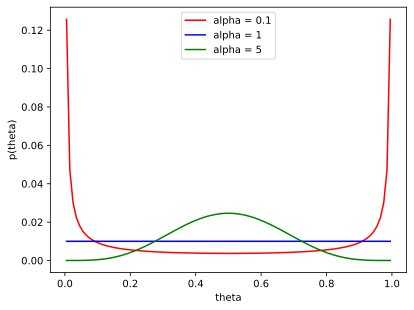

In [11]:
lines_pw1 = [
    plt.plot(possible_pw1, calculate_prior(0.1), 'red', label = "alpha = 0.1"),
    plt.plot(possible_pw1, calculate_prior(1), 'blue', label = "alpha = 1"),
    plt.plot(possible_pw1, calculate_prior(5), 'green', label = "alpha = 5")
]

for p in lines_pw1:
    plt.xlabel("theta")
    plt.ylabel("p(theta)")
    plt.legend()

1. alpha prior 0.1 leads to a prior bias for regularity: either 0% probability of using word 1, OR near 100% probability of using word 1
2. alpha prior 1 leads to a uniform prior: the probabilities of using word 1 are a priori equally likely
3. alpha prior 5 leads to a prior bias for variability

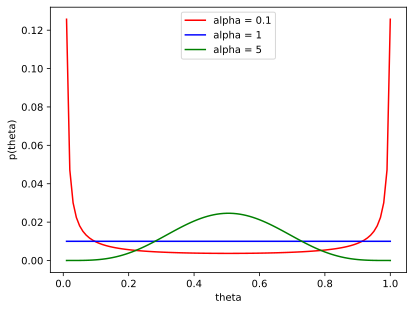

In [12]:
lines_pw1_3 = [
    plt.plot(possible_pw1_3, calculate_prior(0.1), 'red', label = "alpha = 0.1"),
    plt.plot(possible_pw1_3, calculate_prior(1), 'blue', label = "alpha = 1"),
    plt.plot(possible_pw1_3, calculate_prior(5), 'green', label = "alpha = 5")
]

for l in lines_pw1_3:
    plt.xlabel("theta")
    plt.ylabel("p(theta)")

plt.legend()

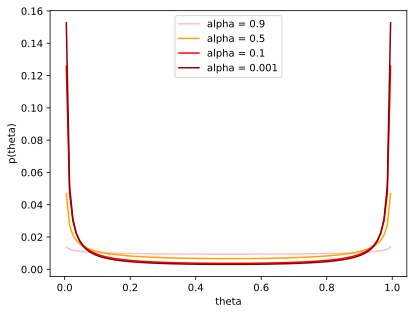

In [13]:
plt.plot(possible_pw1, calculate_prior(0.9), 'pink', label = 'alpha = 0.9')
plt.plot(possible_pw1, calculate_prior(0.5), 'orange', label = 'alpha = 0.5')
plt.plot(possible_pw1, calculate_prior(0.1), 'red', label = 'alpha = 0.1')
plt.plot(possible_pw1, calculate_prior(0.001), 'darkred', label = 'alpha = 0.001')

plt.xlabel("theta")
plt.ylabel("p(theta)")
plt.legend()

Text(0, 0.5, 'p(theta)')

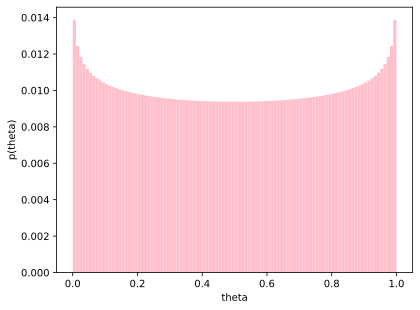

In [14]:
plt.bar(possible_pw1, calculate_prior(0.9), color = 'pink', align = 'center', width = 1 / grid_granularity)
plt.xlabel("theta")
plt.ylabel("p(theta)")

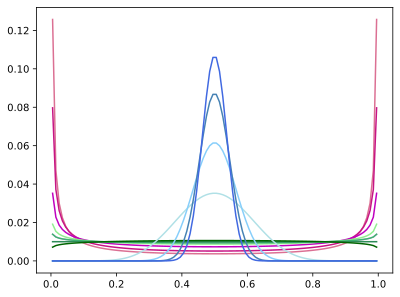

In [15]:
plt.plot(possible_pw1, calculate_prior(0.1), 'palevioletred')
plt.plot(possible_pw1, calculate_prior(0.3), 'mediumvioletred')
plt.plot(possible_pw1, calculate_prior(0.6), 'm')
plt.plot(possible_pw1, calculate_prior(0.9), 'plum')

plt.plot(possible_pw1, calculate_prior(0.8), 'lightgreen')
plt.plot(possible_pw1, calculate_prior(0.9), 'mediumseagreen')
plt.plot(possible_pw1, calculate_prior(1), 'seagreen')
plt.plot(possible_pw1, calculate_prior(1.1), 'darkgreen')

plt.plot(possible_pw1, calculate_prior(10), 'powderblue')
plt.plot(possible_pw1, calculate_prior(30), 'lightskyblue')
plt.plot(possible_pw1, calculate_prior(60), 'steelblue')
plt.plot(possible_pw1, calculate_prior(90), 'royalblue')

Likelihood

In [16]:
def likelihood(data, possible_pw1):
    possible_pw0 = 1 - possible_pw1
    probs = [possible_pw0, possible_pw1]
    likelihoods = []
    for d in data:
        likelihood_this_item = probs[d]
        likelihoods.append(likelihood_this_item)
    return prod(likelihoods)

In [17]:
likelihood([0,0,0,0,0,0], 0.1)

0.5314410000000002

In [18]:
data_lists = []
d = round(random.random())

# list_of_lists = [[i for i in range(1,6)] for _ in range(5)]

In [19]:
list_of_lists = []
list = []
n = 5

for i in range(5):
    for i in range(n):
        list.append(round(random.random()))
    # print(list)
    list_of_lists.append(list)
    # print(list_of_lists)
    list = []
print(list_of_lists)

for list in list_of_lists:
    print(likelihood(list, 0.1))

[[1, 0, 0, 0, 1], [0, 0, 0, 1, 1], [1, 0, 0, 1, 0], [0, 0, 1, 1, 0], [0, 1, 1, 0, 1]]
0.007290000000000002
0.007290000000000001
0.007290000000000001
0.007290000000000001
0.0008100000000000002


In [20]:
print(0.9*0.9*0.9*0.9*0.9)
print(0.9*0.9*0.1*0.1*0.1)
print(0.1*0.1*0.1*0.9*0.9)
print(0.1*0.9*0.9*0.9*0.9)
print(0.1*0.9*0.9*0.9*0.9)

0.5904900000000002
0.0008100000000000002
0.0008100000000000002
0.06561000000000002
0.06561000000000002


In [21]:
def produce(possible_pw1, n_productions):
    possible_pw0 = 1 - possible_pw1
    probs = [possible_pw0, possible_pw1]
    generated_data = []
    for p in range(n_productions):
        generated_data.append(roulette_wheel(probs))
        # roulette_wheel returns the integer index value of the probability from probs = [0.1, 0.9]
        # that is greater than the random number generated at the start
        # generate random r value, r = 0.01
        # is r < pw0 (0.1)?
        # if yes, return a 0
        # generate another random number, r = 0.5
        # is r < pw0 (0.1)?
        # if no, add 0.1 + 0.9
        # is r < 1? 
        # yes, return the index value of the probability that made the accumulator larger than the r, random integer value
    return generated_data

for x in range(3):
    print(produce(0.5, 10))

This is the r value: 0.43013829619700306
This is the accumulator value: 0.5
This is the i value: 0
This is the r value: 0.012491745581609592
This is the accumulator value: 0.5
This is the i value: 0
This is the r value: 0.11059788259041947
This is the accumulator value: 0.5
This is the i value: 0
This is the r value: 0.8048175862571515
This is the accumulator value: 0.5
This is the new accumulator value: 1.0
This is the i value: 1
This is the r value: 0.9101485448703942
This is the accumulator value: 0.5
This is the new accumulator value: 1.0
This is the i value: 1
This is the r value: 0.12372802823124152
This is the accumulator value: 0.5
This is the i value: 0
This is the r value: 0.9983716798189951
This is the accumulator value: 0.5
This is the new accumulator value: 1.0
This is the i value: 1
This is the r value: 0.613265374054274
This is the accumulator value: 0.5
This is the new accumulator value: 1.0
This is the i value: 1
This is the r value: 0.08395365947909972
This is the acc

In [22]:
print(likelihood([0,0,1,1], 0.5))
0.5 * 0.5 * 0.5 * 0.5

0.0625


0.0625

In [23]:
def posterior(data, prior):
    posterior_probs = []
    for i in range(len(possible_pw1)):
        pW1 = possible_pw1[i]
        p_h = prior[i]
        p_d = likelihood(data, pW1)
        p_h_given_d = p_h * p_d
        posterior_probs.append(p_h_given_d)
    return normalize_probs(posterior_probs)

def learn(data, prior):
    posterior_probs = posterior(data, prior)
    selected_index = roulette_wheel(posterior_probs)
    return possible_pw1[selected_index]

This is a uniform prior learner, exposed to data where 0's and 1's have equal frequency. 

data1 [0, 1] 

data2 [0, 0, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1] 

data4 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 



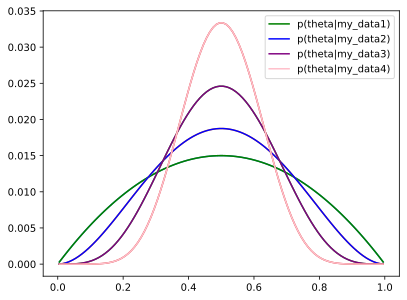

In [77]:
my_prior1 = calculate_prior(1)
my_data1 = [0] * 1 + [1] * 1
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(theta|my_data1)')

my_data2 = [0] * 2 + [1] * 2
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(theta|my_data2)')

my_data3 = [0] * 4 + [1] * 4
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(theta|my_data3)')

my_data4 = [0] * 8 + [1] * 8
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(theta|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

This is a uniform prior learner, where  
1 increases its frequency. 

data1 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 

data2 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data3 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

data4 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 



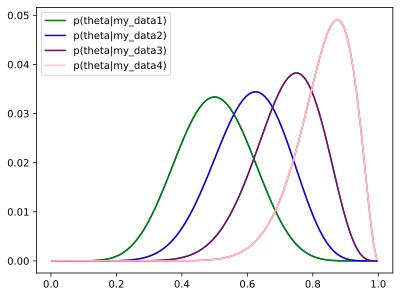

In [78]:
my_prior1 = calculate_prior(1)
my_data1 = [0] * 8 + [1] * 8
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(theta|my_data1)')

my_data2 = [0] * 6 + [1] * 10
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(theta|my_data2)')

my_data3 = [0] * 4 + [1] * 12
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(theta|my_data3)')

my_data4 = [0] * 2 + [1] * 14
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(theta|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')

In [ ]:
my_prior1 = calculate_prior(1)
my_data1 = [0] * 8 + [1] * 8
my_posterior1 = posterior(my_data1, my_prior1)
plt.plot(possible_pw1, my_posterior1)
plt.plot(possible_pw1, my_posterior1,'green',label='p(theta|my_data1)')

my_data2 = [0] * 6 + [1] * 10
my_posterior2 = posterior(my_data2, my_prior1)
plt.plot(possible_pw1, my_posterior2)
plt.plot(possible_pw1, my_posterior2,'blue',label='p(theta|my_data2)')

my_data3 = [0] * 4 + [1] * 12
my_posterior3 = posterior(my_data3, my_prior1)
plt.plot(possible_pw1, my_posterior3)
plt.plot(possible_pw1, my_posterior3,'purple',label='p(theta|my_data3)')

my_data4 = [0] * 2 + [1] * 14
my_posterior4 = posterior(my_data4, my_prior1)
plt.plot(possible_pw1, my_posterior4)
plt.plot(possible_pw1, my_posterior4,'pink',label='p(theta|my_data4)')

plt.legend()

datas = []
datas.append(my_data1)
datas.append(my_data2)
datas.append(my_data3)
datas.append(my_data4)

range(len(datas))
list = [i + 1 for i in range(len(datas))]
['datas' + str(i + 1) for i in range(len(datas))]

numbered_datas = dict(zip(['data' + str(i + 1) for i in range(len(datas))], datas))

for key, value in numbered_datas.items():
    print(key, value, '\n')